# Площадь под графиком и управление порогом

# Из методички

**Методические указания**

In [454]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, auc, classification_report
import matplotlib.pyplot as plt

Сгенерируем датасет для бинарной классификации.

In [455]:
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)

Разделим выборку на обучающую и тестовую Не важны показатели эффективности моделей, поэтому делим датасет пополам.

In [456]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)

In [457]:
model = LogisticRegression().fit(X_train, y_train)

Логистическая регрессия может работать как точечный предиктор (выдавать для входного объекта наиболее вероятный класс), а может - как вероятностный (выдавать оценки вероятности принадлежности к каждому классу, который есть в обучающей выборке).

In [458]:
y_pred_proba = model.predict_proba(X_test)

Для каждого объекта в матрице указано два значения - вероятности его отнесения, по мнению модели, к отрицательному и положительному классу.

In [459]:
y_pred_proba

array([[4.02958497e-03, 9.95970415e-01],
       [2.00643855e-03, 9.97993561e-01],
       [9.94696564e-01, 5.30343592e-03],
       [8.47909962e-01, 1.52090038e-01],
       [1.66614096e-03, 9.98333859e-01],
       [4.99240075e-01, 5.00759925e-01],
       [9.80208762e-01, 1.97912375e-02],
       [9.76507391e-01, 2.34926092e-02],
       [1.79866697e-02, 9.82013330e-01],
       [2.93132539e-01, 7.06867461e-01],
       [9.95836132e-01, 4.16386810e-03],
       [2.53456369e-01, 7.46543631e-01],
       [9.92314475e-01, 7.68552501e-03],
       [3.80237693e-02, 9.61976231e-01],
       [6.47256719e-02, 9.35274328e-01],
       [1.91873737e-01, 8.08126263e-01],
       [8.55142720e-01, 1.44857280e-01],
       [4.34150814e-02, 9.56584919e-01],
       [8.43060465e-01, 1.56939535e-01],
       [5.51009943e-02, 9.44899006e-01],
       [1.32996996e-01, 8.67003004e-01],
       [5.89343759e-01, 4.10656241e-01],
       [9.79492824e-01, 2.05071761e-02],
       [3.32717535e-01, 6.67282465e-01],
       [9.957351

In [460]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])

Данная функция возвращает три массива: значения метрики FPR (false positive rate), TPR (true positive rate) и значение порога.

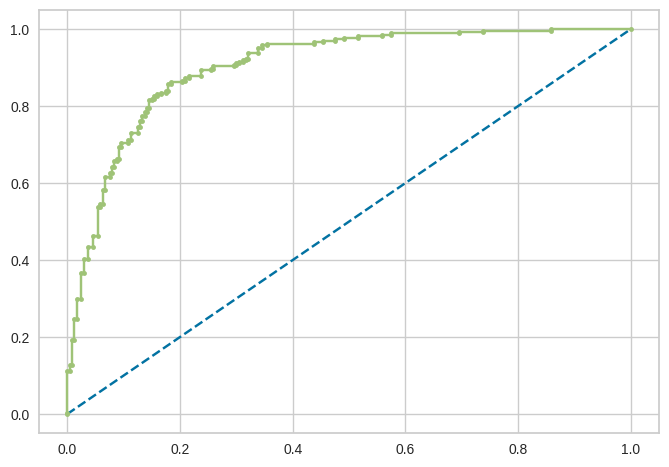

In [461]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [462]:
roc_auc_score(y_test, y_pred_proba[:, 1]) # площадь под графиком кривой

np.float64(0.9027724358974359)

Построим график PR-кривой.

In [463]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba[:, 1])

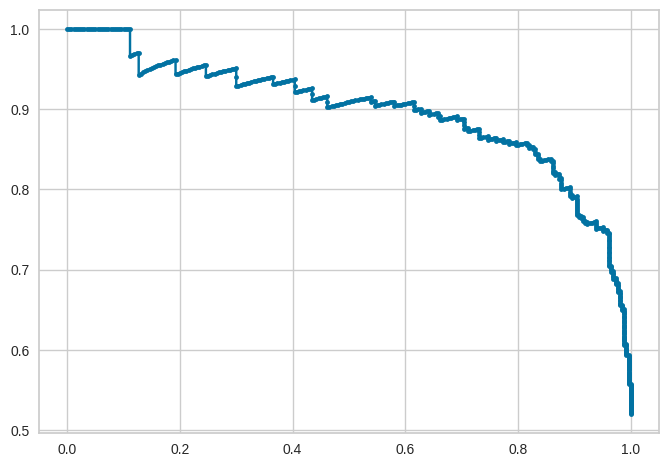

In [464]:
plt.plot(recall, precision, marker='.')
plt.show()

In [465]:
auc(recall, precision) # площадь под графиком PR-кривой (средняя точность модели)

np.float64(0.897662372903334)

In [466]:
y_test_pred = model.predict(X_test)
print(classification_report(y_test, y_test_pred)) # значение порога 0.5

              precision    recall  f1-score   support

           0       0.83      0.82      0.83       240
           1       0.84      0.85      0.84       260

    accuracy                           0.83       500
   macro avg       0.83      0.83      0.83       500
weighted avg       0.83      0.83      0.83       500



Отчет характеризует поведение модели только в одной точке, кривые показывают, как модель будет работать при всех возможных значениях порога.

In [467]:
from sklearn.neighbors import KNeighborsClassifier

На этих же данных обучим модель - метод ближайших соседей.

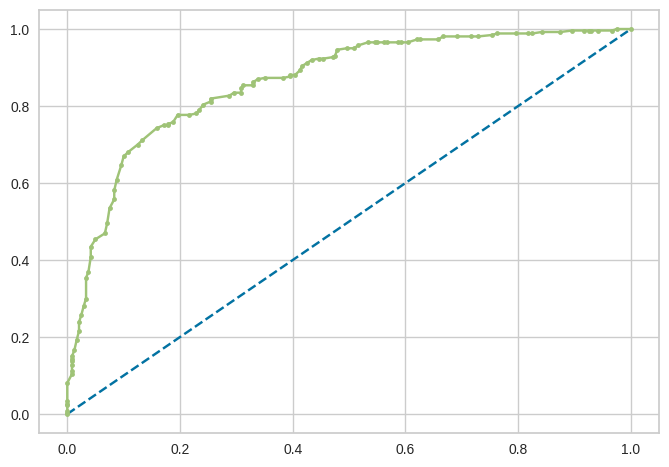

In [468]:
model2 = KNeighborsClassifier(n_neighbors=250).fit(X_train, y_train)
y_pred2_proba = model2.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_pred2_proba[:, 1])

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [469]:
roc_auc_score(y_test, y_pred2_proba[:, 1])

np.float64(0.8630608974358974)

**Дизбаланс классов**

Сгенерируем датасет, в котором объектов разных классов не примерно равное количество, а объектов отрицательного класса 99%.

In [470]:
X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.99, 0.01], random_state=1)

In [471]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=4)

print('Датасет: Class0=%d, Class1=%d' % (len(y[y==0]), len(y[y==1]))) # объем классов в получившихся частях
print('Обучающая: Class0=%d, Class1=%d' % (len(y_train[y_train==0]), len(y_train[y_train==1])))
print('Тестовая: Class0=%d, Class1=%d' % (len(y_test[y_test==0]), len(y_test[y_test==1])))

Датасет: Class0=985, Class1=15
Обучающая: Class0=490, Class1=10
Тестовая: Class0=495, Class1=5


In [472]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y)
# стратификация следит за тем, чтобы в обоих частях выборки распределение
# переданногоатрибута было примерно такое же, как и в целом датасете

In [473]:
model = LogisticRegression().fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)

In [474]:
y_test_pred = model.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       492
           1       0.00      0.00      0.00         8

    accuracy                           0.98       500
   macro avg       0.49      0.50      0.50       500
weighted avg       0.97      0.98      0.98       500



Мажоритарный класс (отрицательный, здесь он в большинстве) распознается очень хорошо, а миноритарный - очень плохо.

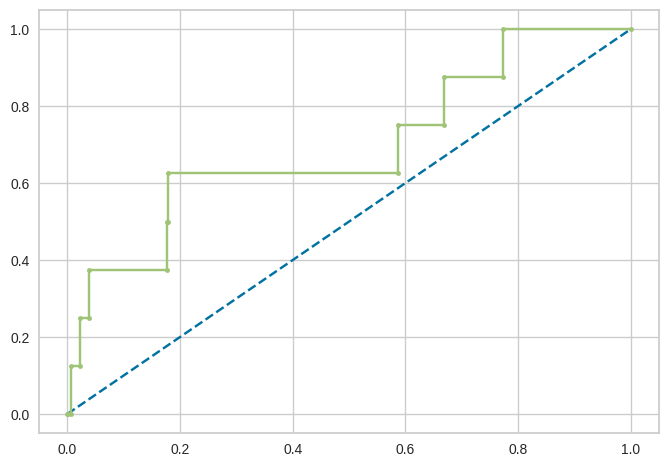

In [475]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

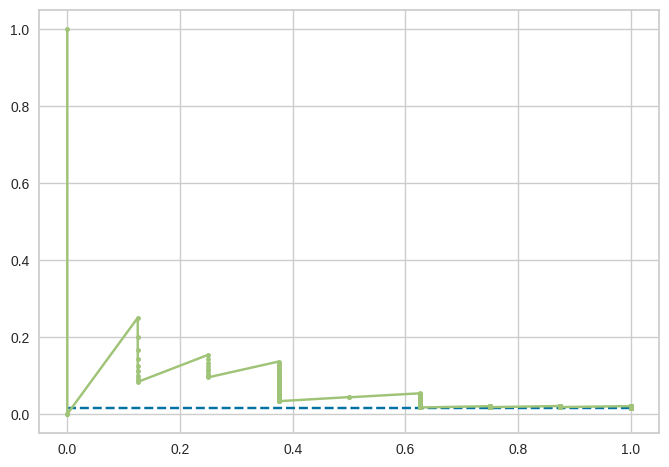

In [476]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba[:, 1])
no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(recall, precision, marker='.')
plt.show()

**Выбор значения порога по кривым**

In [477]:
X, y = make_classification(n_samples=10000, n_classes=2, weights=[0.99, 0.01], random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y)

model = LogisticRegression().fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)

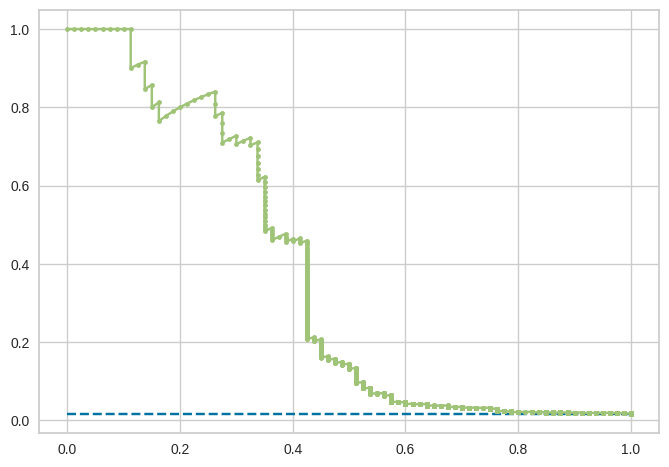

In [478]:
p, r, pr_thresholds = precision_recall_curve(y_test, y_pred_proba[:, 1])
no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(r, p, marker='.')
plt.show()

In [479]:
from numpy import argmax

Вычислим вектор метрик F1 при всех использованных значениях порога и найдем самое большое значение срединих (вернее, его индекс).

In [480]:
f1 = (2 * p * r) / (p + r)
ix = argmax(f1)
pr_thresholds[ix]

np.float64(0.21627846426725228)

In [481]:
print('Порог=%f, F-Score=%.3f' % (pr_thresholds[ix], f1[ix]))

Порог=0.216278, F-Score=0.458


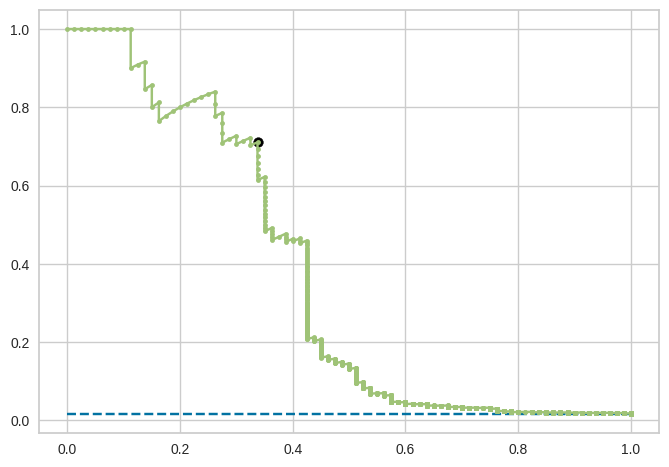

In [482]:
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(r, p, marker='.')
plt.scatter(r[ix], p[ix], marker='o', color='black')
plt.show()

In [483]:
y_pred = (y_pred_proba[:, 1] > pr_thresholds[ix]).astype('int')

In [484]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4920
           1       0.70      0.33      0.44        80

    accuracy                           0.99      5000
   macro avg       0.85      0.66      0.72      5000
weighted avg       0.98      0.99      0.98      5000



In [485]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4920
           1       0.86      0.15      0.26        80

    accuracy                           0.99      5000
   macro avg       0.92      0.57      0.62      5000
weighted avg       0.98      0.99      0.98      5000



# Задания для самостоятельного выполнения

*1. Повторите анализ из лабораторной работы, но с двумерными датасетами. Изобразите графически, как изменение порога влияет на расположение границы принятия решений.*

In [486]:
from matplotlib.colors import ListedColormap

# генерируем двумерный датасет
X, y = make_classification(
    n_samples=500, n_features=2, n_redundant=0, n_clusters_per_class=1, random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [487]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [488]:
# визуализация границы принятия решений
def plot_decision_boundary(model, X, y, threshold, ax):
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))

    # вероятности предсказаний
    probs = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = (probs >= threshold).astype(int).reshape(xx.shape)

    # отображение фона (предсказания модели) и границы (линия уровня)
    ax.contourf(xx, yy, Z, cmap=ListedColormap(['#FFBBBB', '#BBFFBB']), alpha=0.5)
    ax.contour(xx, yy, probs.reshape(xx.shape), levels=[threshold], colors='k', linewidths=2)

    # точки датасета
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['red', 'green']), edgecolor='k')
    ax.set_title(f'Порог классификации: {threshold}')
    ax.set_xlabel('Признак 1')
    ax.set_ylabel('Признак 2')

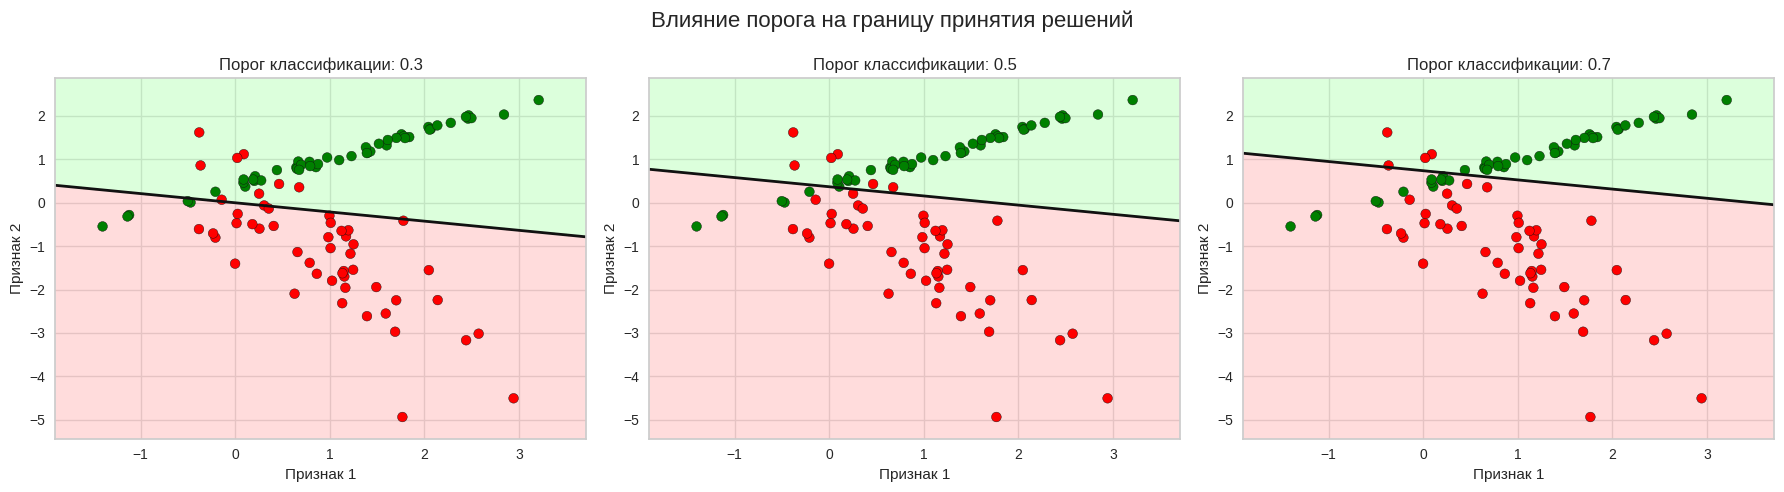

In [489]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
thresholds = [0.3, 0.5, 0.7]
for ax, t in zip(axes, thresholds):
    plot_decision_boundary(model, X_test, y_test, threshold=t, ax=ax)

plt.suptitle("Влияние порога на границу принятия решений", fontsize=16)
plt.tight_layout()
plt.show()

Порог = 0.5: стандартная граница, когда модель считает класс 1, если вероятность > 0.5.

Порог = 0.3: граница сдвигается в сторону класса 0 (модель более склонна предсказывать класс 1).

Порог = 0.7: граница сдвигается в сторону класса 1 (модель более осторожна, реже выдает класс 1).

*2. Повторите анализ на реальном датасете для бинарной классификации. Проинтерпретируйте результат, сделайте вывод.*

Датасет Breast Cancer Wisconsin содержит данные о медицинских характеристиках опухолей груди. Цель - предсказать, является ли опухоль злокачественной (1) или доброкачественной (0). Содержит 569 пациентов и 30 числовых признаков.

In [490]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y, random_state=42)


In [491]:
model = LogisticRegression(max_iter=10000).fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)[:, 1]


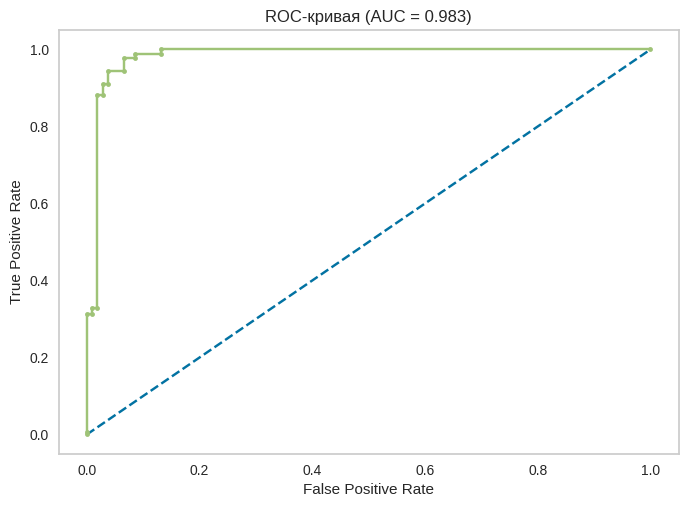

In [492]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.title(f"ROC-кривая (AUC = {roc_auc:.3f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid()
plt.show()


AUC = 0.983 - отличный показатель, близкий к максимальному значению 1. Модель обладает высокой способностью различать положительные и отрицательные классы.

ROC-кривая резко поднимается вверх, что указывает на высокий True Positive Rate при низком False Positive Rate (модель минимизирует ложные срабатывания и обнаруживает истинные положительные случаи).

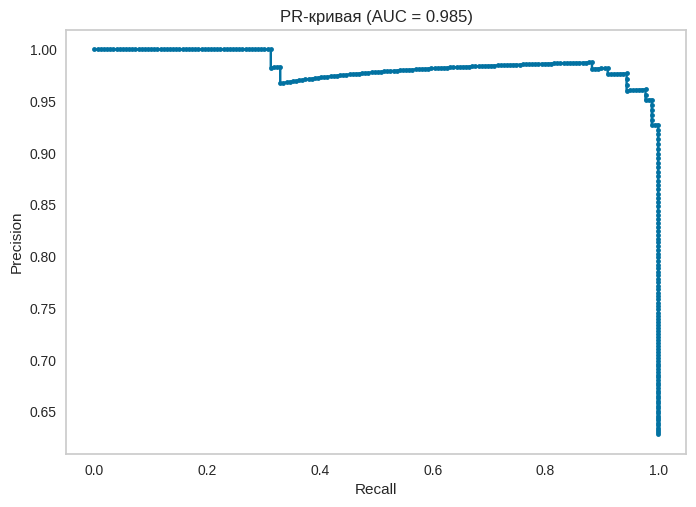

In [493]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)

plt.plot(recall, precision, marker='.')
plt.title(f"PR-кривая (AUC = {pr_auc:.3f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid()
plt.show()


AUC = 0.985 - высокий показатель, близкий к идеальному значению.

Кривая сохраняет выысокую точность (Precision) при увеличении полноты (Recall) => мин кол-во ложноположительных прогнозов.

*3. В задании по оптимизации порога используйте ROC и среднее геометрическое между TPR и FPR как критерий оптимизации.*

In [494]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

y_scores = clf.predict_proba(X_test)[:, 1]


In [495]:
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# cреднее геометрическое между TPR и (1 - FPR)
geo = np.sqrt(tpr * (1 - fpr))

# оптимальный индекс
best_idx = np.argmax(geo)
best_threshold = thresholds[best_idx]

print(f"Оптимальный порог: {best_threshold:.2f}")


Оптимальный порог: 0.49


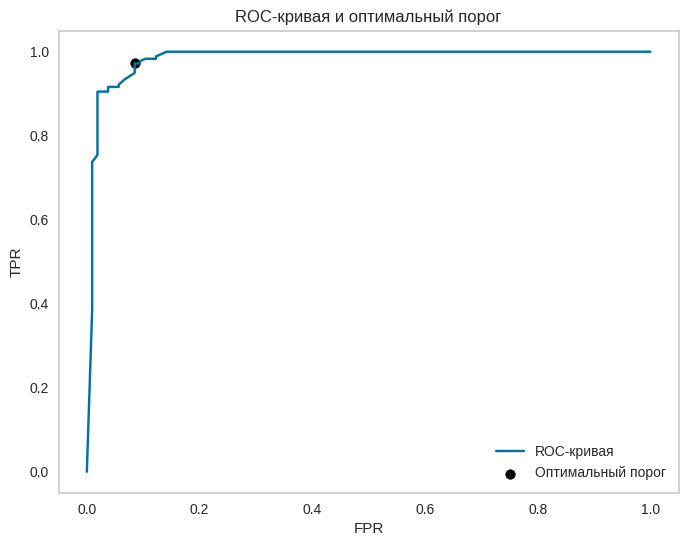

In [496]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC-кривая')
plt.scatter(fpr[best_idx], tpr[best_idx], c='black', label='Оптимальный порог')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC-кривая и оптимальный порог')
plt.legend()
plt.grid()
plt.show()


ROC-кривая резко поднимается вверх - отличная разделяющая способность. AUC близко к 1 - почти идеальное качество классификации.

*4. При оптимизации порога по PR-кривой используйте другую F-метрику - сначала с преимуществом precision, а затем - с превалированием recall. Изобразите получившиеся пороги на графике. Проанализируйте метрики получившихся моделей.*

In [497]:
from sklearn.metrics import precision_recall_curve, fbeta_score, precision_score, recall_score

X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_scores = model.predict_proba(X_test)[:, 1]

In [498]:
# PR-кривая
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
thresholds = np.append(thresholds, 1.0)  # чтобы соответствовало длине precision

In [499]:
# precision
f05_scores = (1 + 0.5**2) * (precision * recall) / (0.5**2 * precision + recall + 1e-8)
ix_f05 = np.argmax(f05_scores)
thr_f05 = thresholds[ix_f05]

In [500]:
# recall
f2_scores = (1 + 2**2) * (precision * recall) / (2**2 * precision + recall + 1e-8)
ix_f2 = np.argmax(f2_scores)
thr_f2 = thresholds[ix_f2]

In [501]:
y_pred_f05 = (y_scores >= thr_f05).astype(int)
y_pred_f2 = (y_scores >= thr_f2).astype(int)

In [502]:
print(f'Порог F0.5: {thr_f05:.2f}')
print(f'Precision: {precision_score(y_test, y_pred_f05):.2f}, Recall: {recall_score(y_test, y_pred_f05):.2f}, F0.5: {fbeta_score(y_test, y_pred_f05, beta=0.5):.2f}')

print(f'\nПорог F2: {thr_f2:.2f}')
print(f'Precision: {precision_score(y_test, y_pred_f2):.2f}, Recall: {recall_score(y_test, y_pred_f2):.2f}, F2: {fbeta_score(y_test, y_pred_f2, beta=2):.2f}')

Порог F0.5: 0.47
Precision: 0.88, Recall: 0.86, F0.5: 0.88

Порог F2: 0.30
Precision: 0.82, Recall: 0.91, F2: 0.89


Порог F0.5

Precision = 0.88 - высокая точность, 88% предсказанных положительных классов верны.

Recall = 0.86, модель находит 86% всех истинных положительных случаев.

F0.5 = 0.88 - уделяет больше внимания точности.

Порог F2

Precision = 0.82 - чуть ниже точность, 88% предсказанных положительных классов верны.

Recall = 0.91, модель находит 91% всех истинных положительных случаев.

F0.5 = 0.89 - уделяет больше внимания полноте.

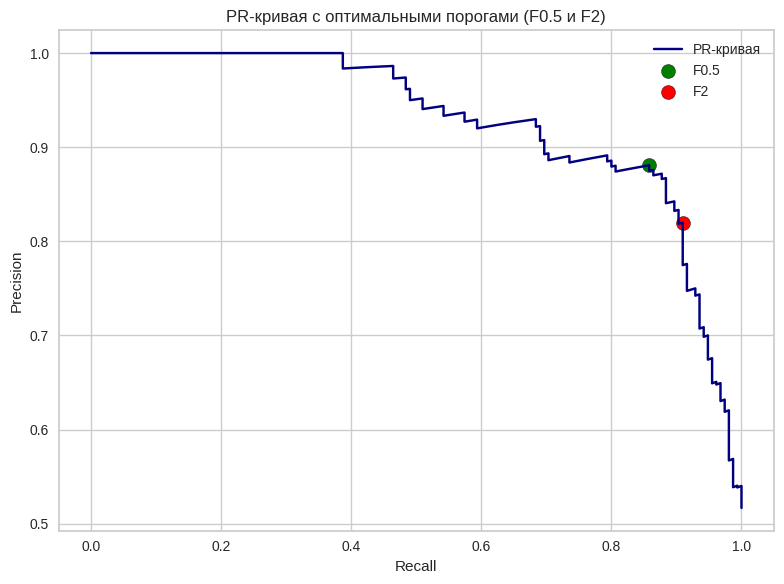

In [503]:
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='PR-кривая', color='navy')
plt.scatter(recall[ix_f05], precision[ix_f05], color='green', label=f'F0.5', s=100, edgecolors='black')
plt.scatter(recall[ix_f2], precision[ix_f2], color='red', label=f'F2', s=100, edgecolors='black')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR-кривая с оптимальными порогами (F0.5 и F2)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Чем ниже порог, тем выше Recall, но ниже Preciion.

Чем выше порог, тем выше Precision, но ниже Recall.

*5. Постройте классификационные кривые для задачи множественной классификации. Проинтерпретируйте результат.*

In [504]:
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

In [505]:
# датасет с 3 классами
X, y = make_classification(n_samples=1000, n_classes=3, n_informative=5,
                           n_clusters_per_class=1, n_features=10, random_state=42)
y_bin = label_binarize(y, classes=[0, 1, 2])
n_classes = y_bin.shape[1]

X_train, X_test, y_train_bin, y_test_bin = train_test_split(X, y_bin, test_size=0.3, random_state=42)

In [506]:
# обучение модели
clf = OneVsRestClassifier(LogisticRegression())
clf.fit(X_train, y_train_bin)
y_score = clf.predict_proba(X_test)

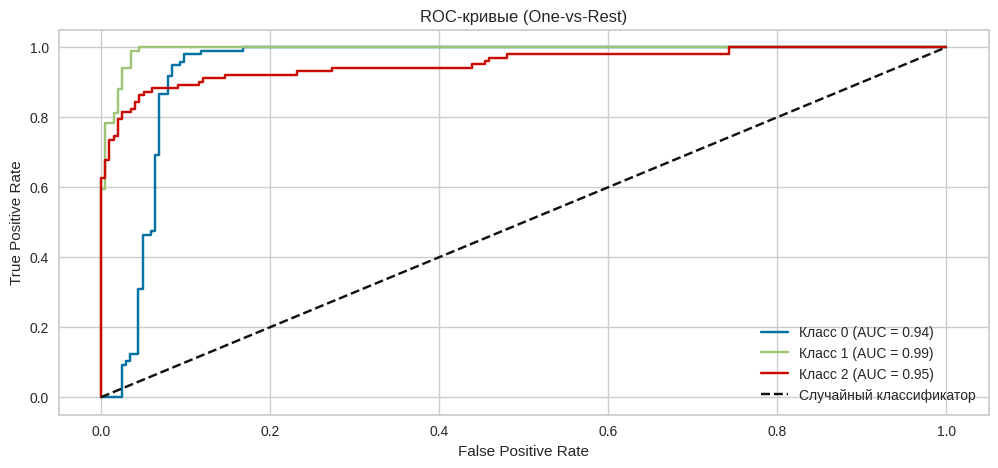

In [507]:
# ROC-кривые
plt.figure(figsize=(12, 5))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Класс {i} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Случайный классификатор')
plt.title('ROC-кривые (One-vs-Rest)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

ROC-кривые отражают способность модели отделять каждый класс от остальных.

Все кривые значительно выше диагонали - высокое качество модели для всех классов. Класс 1 показывает почти идеальное разделение.

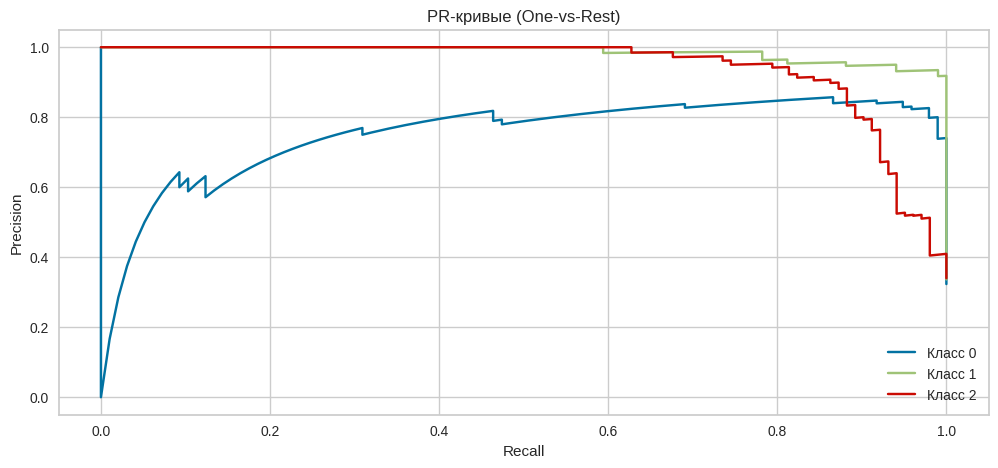

In [508]:
# PR-кривые
plt.figure(figsize=(12, 5))
for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])
    plt.plot(recall, precision, label=f'Класс {i}')
plt.title('PR-кривые (One-vs-Rest)')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)
plt.show()


PR-кривые показывают, насколько хорошо модель предсказывает положительные примеры каждого класса.

Модель достаточно эффективна. Класс 1 демонстрирует наилучшую производительность (кривая ближе всего к верхнему правому углу). Класс 0 и 2 сильно уступают, возможно наблюдается дисбаланс классов.

*6. Используйте для построения кривых библиотеку yellowbrick.*

In [509]:
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

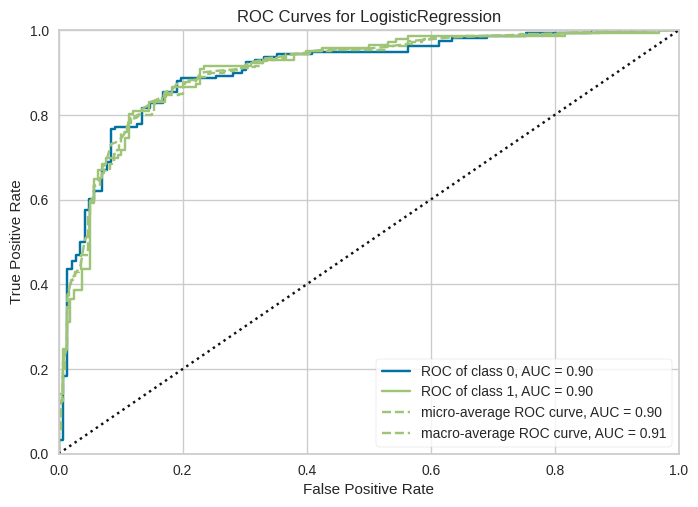

<Axes: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [510]:
from yellowbrick.classifier import ROCAUC, PrecisionRecallCurve


visualizer_roc = ROCAUC(model)
visualizer_roc.fit(X_train, y_train)
visualizer_roc.score(X_test, y_test)
visualizer_roc.show()

Оба класса демонстрируют одинаково высокое качество классификации.

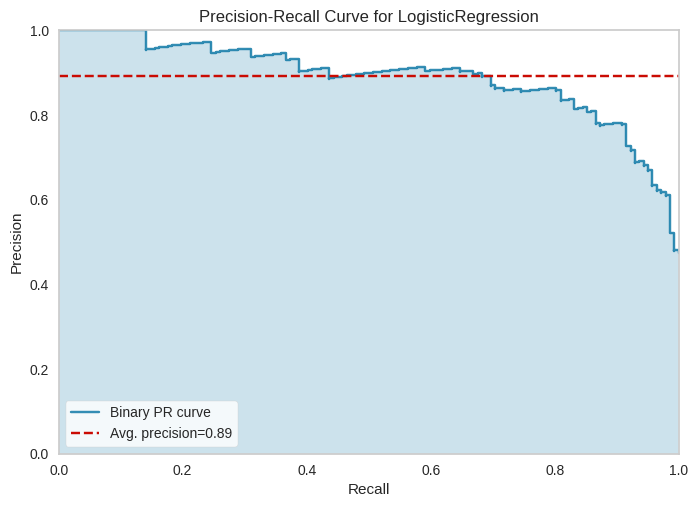

<Axes: title={'center': 'Precision-Recall Curve for LogisticRegression'}, xlabel='Recall', ylabel='Precision'>

In [511]:
visualizer_pr = PrecisionRecallCurve(model)
visualizer_pr.fit(X_train, y_train)
visualizer_pr.score(X_test, y_test)
visualizer_pr.show()

Результат близок к идеальному. Кривая начинается с высокой точности (Precision) при низкой полноте (Recall) и постепенно снижается по мере увеличения полноты.